# WSI - Ćwiczenie pierwsze
*Tomasz Żebrowski*


### 1. Rysowanie wykresów zadanych funkcji
Do tworzenia wykresów wykorzystuję bibliotekę `matplotlib`. Rysunki zrealizowane są w ramach pliku `plotting.py`

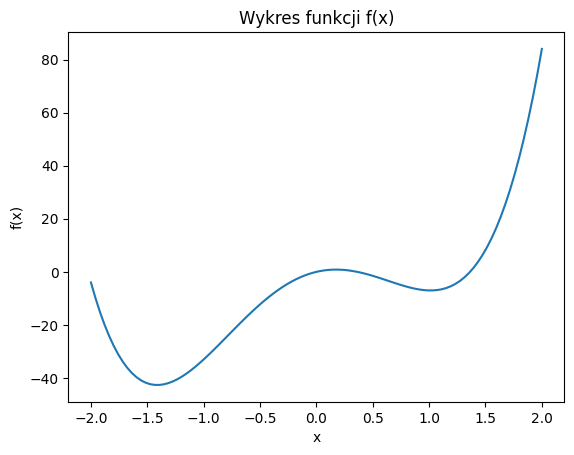

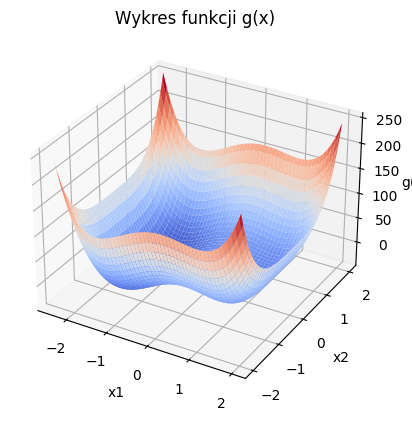

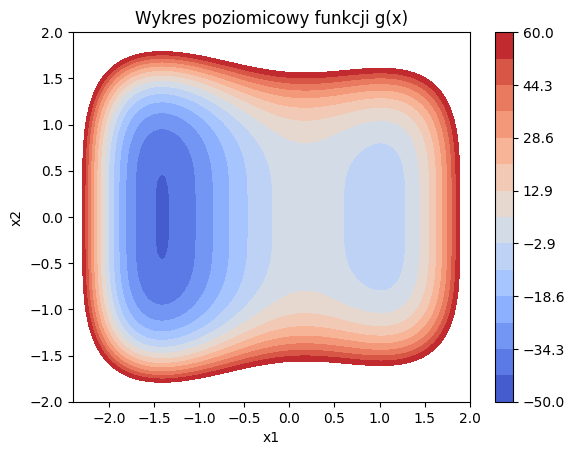

In [26]:
%matplotlib inline
from plotting import plot
plot()

Oprócz zwykłego wykresu dla funkcji *f(x)* oraz trójwymiarowego dla *g(x)* rysuję również wykres poziomicowy funkcji *g(x)*, pozwoli on łatwiej zidentyfikować przybliżone położenie minimów, co przyda się przy sprawdzaniu poprawności rozwiązań.

### 2. Implementacja algorytmu najszybszego spadku
Algorytm najszybszego spadku implementuję w ramach pliku `gradient_descent.py`. Napisany kod znajduje się również poniżej:

In [64]:
def gradient_descent(x, df, h=1e-4, e=1e-4, max_iters=1e4):
    iters = 0
    while (iters < max_iters and sum([i**2 for i in df(x)]) > e):
        x = [x[i] - h * df(x)[i] for i in range(len(x))]
        iters += 1
    return x, iters

Funkcja ta, oprócz znalezionego rozwiązania, zwraca również liczbę poświęconych mu iteracji aby umożliwić późniejsze porównywanie różnych kombinacji parametrów. Jako kryteria stopu przyjąłem osiągnięcie maksymalnej liczby iteracji oraz zmniejszenie normy gradientu poniżej założonego progu precyzji.

Algorytm wykorzystuję do znalezienia minimum funkcji *f* oraz *g*

In [5]:
from functions import f, g, df, dg
print("Funkcja f")
x0 = 1
print("Punkt poczatkowy: x0 =", x0)
solution = gradient_descent([x0], df)
print("Znalezione minimum:\nx\t", solution[0][0], "\nf(x)\t", f(solution[0]))
x0 = -1
print("\nPunkt poczatkowy: x0 =", x0)
solution = gradient_descent([x0], df)
print("Znalezione minimum:\nx\t", solution[0][0], "\nf(x)\t", f(solution[0]))

print("\nFunkcja g")
x0 = [1, 1]
print("Punkt poczatkowy: x0 =", x0)
solution = gradient_descent(x0, dg)
print("Znalezione minimum:\nx\t", solution[0], "\nf(x)\t", g(solution[0]))
x0 = [-1, 1]
print("\nPunkt poczatkowy: x0 =", x0)
solution = gradient_descent(x0, dg)
print("Znalezione minimum:\nx\t", solution[0], "\nf(x)\t", g(solution[0]))

Funkcja f
Punkt poczatkowy: x0 = 1
Znalezione minimum:
x	 1.012436193130931 
f(x)	 -7.006321552031551

Punkt poczatkowy: x0 = -1
Znalezione minimum:
x	 -1.4123064343966703 
f(x)	 -42.62767846192071

Funkcja g
Punkt poczatkowy: x0 = [1, 1]
Znalezione minimum:
x	 [1.0125586528323793, 0.06299592921407254] 
f(x)	 -7.00616467234903

Punkt poczatkowy: x0 = [-1, 1]
Znalezione minimum:
x	 [-1.4123706144776467, 0.06299592921407254] 
f(x)	 -42.627521290079116


Otrzymane minima porównuję z rysunkami wykresów funkcji z poprzedniego punktu. Widać, że wszystkie rozwiązania poprawnie wskazują minima funkcji f i g. Znalezione zostały zarówno minima lokalne, jak i globalne.

### 3. Badanie stworzonego algorytmu
Sprawdzam wpływ punktu startowego i rozmiaru kroku na tempo zbieżności algorytmu do minimum. W tym celu mierzę liczbę iteracji potrzebnych do osiągnięcia satysfakcjonującego wyniku w zależności od obranych parametrów. Doświadczenie powtarzam dla obu badanych funkcji.

In [36]:
# Funkcja f
starting_points_f = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
step_sizes_f = [3e-1, 1e-1, 3e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5]
iteration_counts_f = [[0 for i in range(len(step_sizes_f))] for j in range(len(starting_points_f))]
for i, x0 in enumerate(starting_points_f):
    for j, h in enumerate(step_sizes_f):
        try:
            iteration_counts_f[i][j] = gradient_descent([x0], df, h)[1]
        except OverflowError:
            iteration_counts_f[i][j] = 10000 # Algorytm rozbieżny

In [75]:
# Funkcja g
starting_points_g = [[0,0], [1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, -1], [-1, 1]]
step_sizes_g = [3e-1, 1e-1, 3e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5]
iteration_counts_g = [[0 for i in range(len(step_sizes_g))] for j in range(len(starting_points_g))]
solutions_g = [[],[]]
for i, x0 in enumerate(starting_points_g):
    for j, h in enumerate(step_sizes_g):
        try:
            solution = gradient_descent(x0, dg, h)
            iteration_counts_g[i][j] = solution[1]
            solutions_g[0].append(solution[0][0])
            solutions_g[1].append(solution[0][1])
        except OverflowError:
            iteration_counts_g[i][j] = 10000 # Algorytm rozbieżny

Na poniższym rysunku przedstawione są wyniki dla funkcji *f* dla przykładowego punktu startowego (-1) dla różnych rozmiarów kroku. Dla zwiększenia czytelności wykresu obrana została skala logarytmiczna.

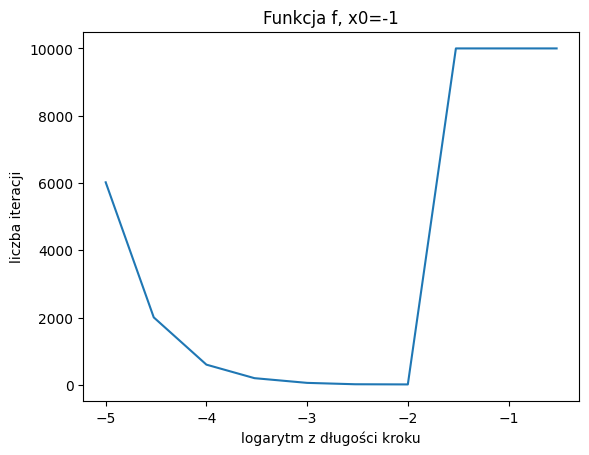

In [66]:
import matplotlib.pyplot as plt
from math import log
index = 3
x = [log(i, 10) for i in step_sizes_f]
y = iteration_counts_f[index]
plt.plot(x, y)
plt.xlabel("logarytm z długości kroku")
plt.ylabel("liczba iteracji")
plt.title("Funkcja f, x0=" + str(starting_points_f[index]))
plt.show()

Jak widać, wydłużanie kroku algorytmu znacząco przyspiesza zbieżność do minimum. Niestety, krok zbyt duży (w tym przypadku większy niż 0,01) może prowadzić do sytuacji, w której algorytm przestaje być zbieżny. Na wykresie widać, że iteracje zatrzymały się dopiero na ustawionym górnym limicie. Poniżej przedstawiam analogiczne wykresy z innymi punktami początkowymi.

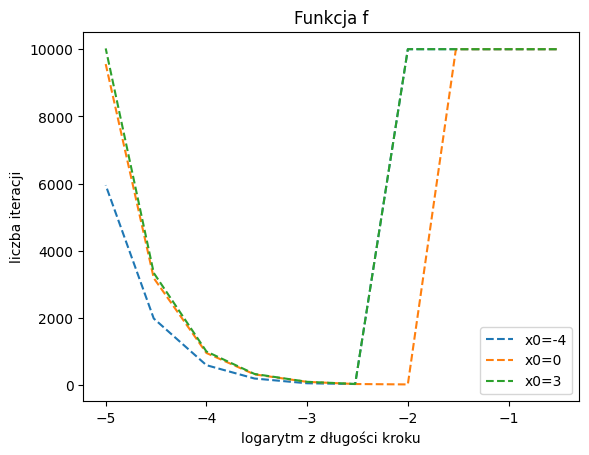

In [59]:
index = 0
x = [log(i, 10) for i in step_sizes_f]
y = iteration_counts_f[index]
plt.plot(x, y, "--", label="x0=" + str(starting_points_f[index]))

index = 4
x = [log(i, 10) for i in step_sizes_f]
y = iteration_counts_f[index]
plt.plot(x, y, "--", label="x0=" + str(starting_points_f[index]))

index = 7
x = [log(i, 10) for i in step_sizes_f]
y = iteration_counts_f[index]
plt.plot(x, y, "--", label="x0=" + str(starting_points_f[index]))

plt.xlabel("logarytm z długości kroku")
plt.ylabel("liczba iteracji")
plt.title("Funkcja f")
plt.legend()
plt.show()

Można zauważyć, że maksymalna długość kroku, przy której algorytm jest zbieżny jest różna dla różnych punktów początkowych. Wnioskuję, że nie powinno się obierać długości kroku największej jak to możliwe. Jako domyślny parametr w moim solwerze wybrałem długość kroku `h=1e-4`. Dla tej wartości na wszystkich wykresach wpływ wydłużania kroku na tempo zbieżności zaczyna być mniejszy, uznałem zatem, że dla bezpieczeństwa nie warto wydłużać kroku bardziej.

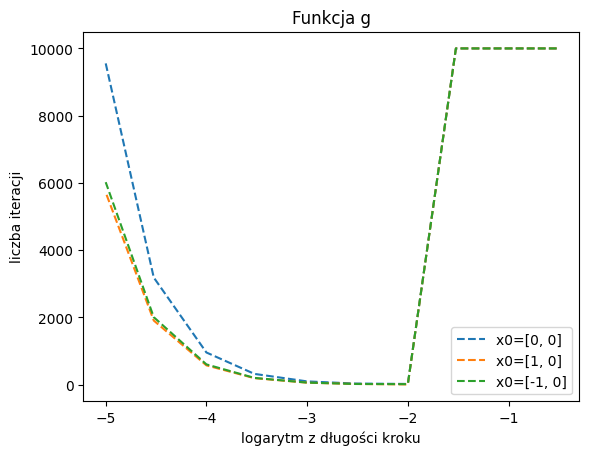

In [72]:
for index in range(3):
    x = [log(i, 10) for i in step_sizes_g]
    y = iteration_counts_g[index]
    plt.plot(x, y, "--", label="x0=" + str(starting_points_g[index]))
plt.xlabel("logarytm z długości kroku")
plt.ylabel("liczba iteracji")
plt.title("Funkcja g")
plt.legend()
plt.show()

Jak widać powyżej, analogiczne wykresy dla funkcji g dla kilku przykładowych punktów potwierdzają dotychczasowe obserwacje.

Następnie, sprawdzam dokładność rozwiązań otrzymanych dla różnych kroków i punktów startowych na podstawie wykresu funkcji g.

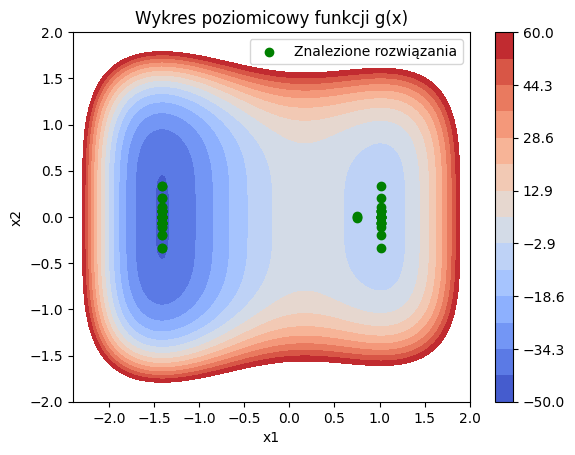

In [88]:
import numpy as np
from pylab import meshgrid

x = np.linspace(-2.4, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = meshgrid(x, y)
Z = g([X, Y])
plt.contourf(X, Y, Z, np.linspace(-50, 60, 15), cmap=plt.cm.coolwarm)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Wykres poziomicowy funkcji g(x)")
plt.colorbar()
plt.scatter(solutions_g[0], solutions_g[1], label="Znalezione rozwiązania", color="green")
plt.legend()
plt.show()

Jak widać, znalezione punkty trafiają w minima funkcji. Niestety, widać róznież duży rozstrzał tych rozwiązań. Można na to wpłynąć zmieniając parametr zakładanej precyzji solwera. Poniższy kod ponawia eksperyment z wyższym ustawieniem precyzji `e` niż poprzednio

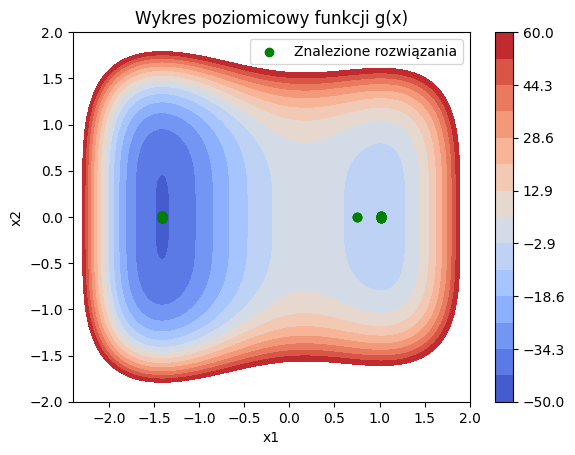

In [94]:
starting_points_g = [[0,0], [1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, -1], [-1, 1]]
step_sizes_g = [3e-1, 1e-1, 3e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5]
iteration_counts_g = [[0 for i in range(len(step_sizes_g))] for j in range(len(starting_points_g))]
solutions_g = [[],[]]
for i, x0 in enumerate(starting_points_g):
    for j, h in enumerate(step_sizes_g):
        try:
            solution = gradient_descent(x0, dg, h, 1e-8, 1e8)
            iteration_counts_g[i][j] = solution[1]
            solutions_g[0].append(solution[0][0])
            solutions_g[1].append(solution[0][1])
        except OverflowError:
            iteration_counts_g[i][j] = 10000 # Algorytm rozbieżny

x = np.linspace(-2.4, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = meshgrid(x, y)
Z = g([X, Y])
plt.contourf(X, Y, Z, np.linspace(-50, 60, 15), cmap=plt.cm.coolwarm)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Wykres poziomicowy funkcji g(x)")
plt.colorbar()
plt.scatter(solutions_g[0], solutions_g[1], label="Znalezione rozwiązania", color="green")
plt.legend()
plt.show()

Jak widać, teraz wsyzstkie rozwiązania są skupione dokładnie w minimach. Niestety, zwiększenie zakładanej precyzji bardzo źle wpłynęło na czas obliczeń (18m 23.3s zamiast 1.5s!) Porównując uzyskane rozwiązania do tych z poprzedniego eksperymentu można zauważyć, że różnice wartości funkcji w wyznaczonych punktach zmieniły się dopiero na 3. miejscu po przecinku. Oznacza to, że mimo zauważalnej różnicy między rozwiązaniami, wszystkie z nich były niemalże równie dobrze. Można na tej podstawie wywnioskować, że zbytnie poprawianie precyzji nie ma szczególnego sensu. Kosztem znacznego wydłużenia czasu obliczeń rozwiązania poprawione zostały minimalnie.